# Physics 240 - Assignment 2

# Ramon Ciutad Perez

This code must be read along with the handwritten notebook, which includes all formulas used here and their derivations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy.optimize import brute
from scipy.optimize import minimize
import scipy
from scipy.optimize import differential_evolution

## Problem 1 : Modelling Noisy Data

# 1) a)

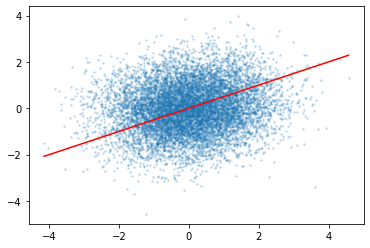

In [2]:
# Exercise 1 part a)
N = 10000
z_array = np.random.uniform(-1, 1, N)
x_noise = np.random.normal(0, 1, N)
y_noise = np.random.normal(0, 1, N)

x_array = z_array + x_noise
y_array = 0.5*z_array + y_noise


fig=plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_array, y_array, s=2.5, alpha=0.2)
x_model = np.linspace(min(x_array), max(x_array))
ax.plot(x_model, 0.5*x_model, c='r')

# 1) b)

In [3]:
# Exercise 1 part b)
data_matrix = np.reshape(y_array, ((len(y_array), 1)))
sigma_matrix = np.identity(len(z_array))
# sigma_inverse = np.linalg.inv(sigma_matrix)
sigma_inverse = sigma_matrix
A_matrix = np.reshape(x_array, (len(x_array), 1))
A_transpose = np.transpose(A_matrix)
beta_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, A_matrix))
beta_inverse = np.linalg.inv(beta_matrix)
alpha_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, data_matrix))

theta_star = (beta_inverse * alpha_matrix)[0][0]
std_away = (0.5 - theta_star)/np.sqrt(beta_inverse[0][0])

print(f'The a parameter that minimizes the chi-squared is: {theta_star:.3f} ± {np.sqrt(beta_inverse[0][0]):.3f}')
print(f'This result is {std_away:3.1f} standard deviations away from the true value of 0.5')

# params, covr = np.polyfit(x_array, y_array, 1, cov=True)

print('The probability of getting this result is: {}'.format(2*(ss.norm.sf(std_away))))

The a parameter that minimizes the chi-squared is: 0.127 ± 0.009
This result is 43.2 standard deviations away from the true value of 0.5
The probability of getting this result is: 0.0


# 1) c)

In [4]:
# Exercise 1 part c)
a = 1
b = (np.sum(x_array**2) - np.sum(y_array**2)) / np.sum(x_array * y_array)
c = -1
# Solve quadratic formula:
solution_1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
solution_2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

print('The corresponding solutions for a are: {0}, {1}'.format(solution_1, solution_2))

a_star = solution_2
DoF = N - 1
chi_squared = np.sum((y_array - a_star*x_array)**2 / (1 + a_star**2))
chi_squared_per_dof = chi_squared / DoF
print('The chi-squared per degree of freedom is: {:3.2f}'.format(chi_squared_per_dof))

# Now calculate the a_star for different values of N:
def optimal_a(N_datapoints):
    z__array = np.random.uniform(-1, 1, N_datapoints)
    x__noise = np.random.normal(0, 1, N_datapoints)
    y__noise = np.random.normal(0, 1, N_datapoints)

    x__array = z__array + x__noise
    y__array = 0.5*z__array + y__noise
    
    a = 1
    b = (np.sum(x__array**2) - np.sum(y__array**2)) / np.sum(x__array * y__array)
    c = -1
    a_MLE = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return a_MLE

for N_trial in [100_000, 1_000_000, 10_000_000]:
    print(f"Using N = {N_trial}, best-fit value for 'a' is : {optimal_a(N_trial):.5f}")


The corresponding solutions for a are: 0.5043020043186256, -1.98293877763013
The chi-squared per degree of freedom is: 1.43
Using N = 100000, best-fit value for 'a' is : 0.49771
Using N = 1000000, best-fit value for 'a' is : 0.49787
Using N = 10000000, best-fit value for 'a' is : 0.50058


# 1) d)

In [5]:
# Exercise 1 part e)
z_array = np.random.uniform(-1, 1, 10000)
x_noise = np.random.normal(0, abs(z_array), 10000)
y_noise = np.random.normal(0, 1, 10000)

x_array = z_array + x_noise
y_array = 0.5*z_array + y_noise

# Case 1
a_array = np.linspace(0, 200, 10000)
chi_sqr_array_1 = np.array([])
for a in a_array:
    variance_1 = 1 + a**2 * abs(x_array)
    chi_sqr = np.sum((y_array - a*x_array)**2 / variance_1)
    chi_sqr_array_1 = np.append(chi_sqr_array_1, chi_sqr)
chi_sqr_min_1 = min(chi_sqr_array_1)
a_optimal_1 = a_array[np.argwhere(chi_sqr_array_1==chi_sqr_min_1)][0][0]

# csq_within_range = chi_sqr_array_1[np.argwhere((chi_sqr_array_1 - chi_sqr_min_1) <= 1)]
a_within_range_1 = a_array[np.argwhere((chi_sqr_array_1 - chi_sqr_min_1) <= 1)]
# a_std_1 = ((max(a_within_range_1) - min(a_within_range_1)) / 2)[0]

a_std_1 = ((max(a_within_range_1) + min(a_within_range_1) - 2*a_optimal_1) / 2)[0]


print('For the first model, the optimal value of a is: {0:.2f} ± {1:.2f}'.format(a_optimal_1, abs(a_std_1)))
print('This result is off by {:.2f} standard deviations from the true value of 0.5'
      .format(abs(a_optimal_1 - 0.5)/abs(a_std_1)))
                                     

# Case 2
a_array = np.linspace(0, 2, 1000)
chi_sqr_array_2 = np.array([])
for a in a_array:
    variance_2 = 1 + a**2 * abs(z_array)
    chi_sqr = np.sum((y_array - a*x_array)**2 / variance_2)
    chi_sqr_array_2 = np.append(chi_sqr_array_2, chi_sqr)
chi_sqr_min_2 = min(chi_sqr_array_2)
a_optimal_2 = a_array[np.argwhere(chi_sqr_array_2==chi_sqr_min_2)][0][0]

a_within_range_2 = a_array[np.argwhere((chi_sqr_array_2 - chi_sqr_min_2) <= 1)]
a_std_2 = ((max(a_within_range_2) - min(a_within_range_2)) / 2)[0]
# a_std_2 = ((max(a_within_range_2) + min(a_within_range_2) - 2*a_optimal_2) / 2)[0]


print('For the second model, the optimal value of a is: {0:.2f} ± {1:.2f}'.format(a_optimal_2, abs(a_std_2)))
print('This result is off by {:.2f} standard deviations from the true value of 0.5'
      .format(abs(a_optimal_2 - 0.5)/abs(a_std_2)))

For the first model, the optimal value of a is: 88.49 ± 7.25
This result is off by 12.14 standard deviations from the true value of 0.5
For the second model, the optimal value of a is: 1.03 ± 0.04
This result is off by 12.34 standard deviations from the true value of 0.5


## Problem 2 : Cosmic Dawn

Original paper available at https://www.nature.com/articles/nature25792.

### Part 1

# 2) 1) a)

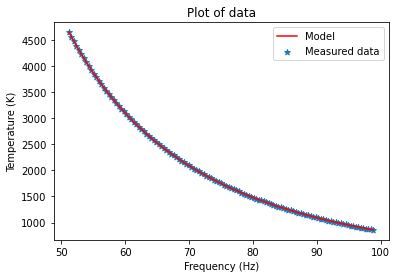

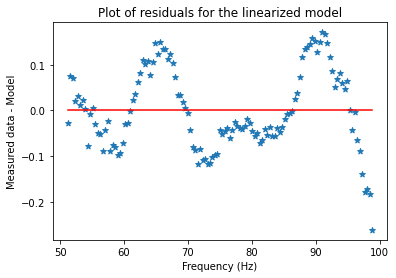

In [6]:
# Exercise 2 part a)
def create_row(nu):
    array = np.array([nu**-2.5, nu**-2.5 * np.log(nu), nu**-2.5 * np.log(nu)**2 , nu**-4.5, nu**-2])
    return np.reshape(array, (1, 5)) 

data = np.genfromtxt('skytemperature.csv', delimiter=',', skip_header=True)
frequencies = data[3:126, 0]
T_sky = data[3:126, 2]


# Least-squares fitting:
data_matrix = np.reshape(T_sky, (len(T_sky), 1))
sigma_matrix = np.identity(len(T_sky))
sigma_inverse = np.linalg.inv(sigma_matrix)
frequencies_matrix = np.reshape(frequencies/75, (len(frequencies), 1))

# Creating the A matrix:
A_matrix = create_row(frequencies_matrix[0])
for i in range(1, len(frequencies_matrix)):
    A_matrix = np.vstack((A_matrix, create_row(frequencies_matrix[i])))
# Transpose it:
A_transpose = np.transpose(A_matrix)

alpha_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, data_matrix))
beta_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, A_matrix))
beta_inverse = np.linalg.inv(beta_matrix)

theta_star = np.matmul(beta_inverse, alpha_matrix)
T_model = np.matmul(A_matrix, theta_star)
difference = data_matrix - T_model
chi_sqr_original = np.matmul(np.transpose(difference), difference)

# Plot measured data and model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(frequencies, T_sky, marker='*', label='Measured data')
ax.plot(frequencies, T_model, c='r', label='Model')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Temperature (K)')
ax.set_title('Plot of data')
ax.legend()
plt.show()

# Plot residuals
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(frequencies, np.reshape(T_sky, (len(T_sky), 1)) - T_model, marker='*')
ax.plot([frequencies[0], frequencies[-1]], [0, 0], c='r')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Measured data - Model')
ax.set_title('Plot of residuals for the linearized model')
plt.show()

# 2) 1) b)

<ipython-input-7-19a05c5b4acd>:6: RuntimeWarning: overflow encountered in multiply
  return b_0 * np.power(nu, term_1) * np.exp(term_2) + b_4 * nu**-2


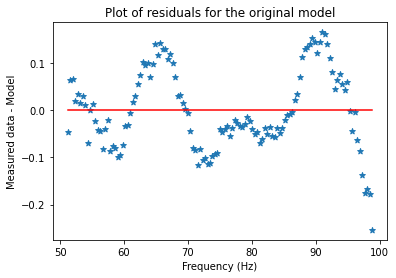

In [7]:
# Exercise 2 part b)
def model_2(nu, b_0, b_1, b_2, b_3, b_4):
    term_1 = -2.5 + b_1 + b_2*np.log(nu)
    term_2 = -b_3 * nu**-2
    
    return b_0 * np.power(nu, term_1) * np.exp(term_2) + b_4 * nu**-2

model_params = curve_fit(model_2, frequencies/75, T_sky, maxfev=10000)[0]
T_model_2 = model_2(frequencies_matrix, model_params[0], model_params[1],
                                model_params[2], model_params[3], model_params[4])
# Plot residuals
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(frequencies, np.reshape(T_sky, (len(T_sky), 1)) - T_model_2, marker='*')
ax.plot([frequencies[0], frequencies[-1]], [0, 0], c='r')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Measured data - Model')
ax.set_title('Plot of residuals for the original model')
plt.show()

# 2) 1) c)

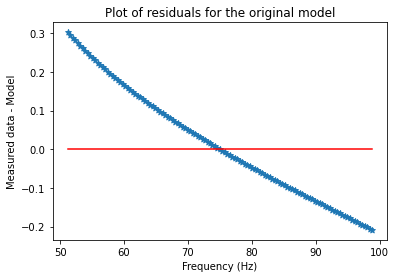

In [8]:
# Exercise 2 part c)
def model_3_function(nu, b0, b1, b2, b3):
    term_1 = np.log(b0)
    term_2 = (b1 + b2*np.log(nu)) * np.log(nu)
    term_3 = -b3 * nu**-2
    return term_1 + term_2 + term_3
    
def create_row_2(nu):
    row = np.array([1, np.log(nu), np.log(nu)**2, -nu**2])
    # return np.reshape(row, (1, 4))
    return row

def create_A_matrix_1():
    A_matrix = create_row_2(frequencies_matrix[0][0])
    for i in range(1, len(frequencies_matrix)):
        A_matrix = np.vstack((A_matrix, create_row_2(frequencies_matrix[i][0])))
    # theta_array = np.array([np.log(b0), b1, b2, b3])
    return A_matrix

def data_function(b4):
    T_data = np.reshape(T_sky, (len(T_sky), 1))
    return np.log((T_data - b4 * frequencies_matrix**-2) * frequencies_matrix**2.5)

def calculate_chi_sqr(b4, return_params=False):
    T_data = np.reshape(T_sky, (len(T_sky), 1))
    
    data = data_function(b4)
    variance_array = 1 / (T_data - b4 * frequencies_matrix**-2)**2
    cov_matrix = np.diag(np.reshape(variance_array, len(variance_array)))
    cov_matrix_inverse = np.diag(np.reshape(variance_array**-1, len(variance_array)))
    A_matrix = create_A_matrix_1()
    A_transpose = np.transpose(A_matrix)
    beta_matrix = np.matmul(A_transpose, np.matmul(cov_matrix_inverse, A_matrix))
    beta_inverse = np.linalg.inv(beta_matrix)
    alpha_matrix = np.matmul(A_transpose, np.matmul(cov_matrix_inverse, data))
    theta_star = np.matmul(beta_inverse, alpha_matrix)
    
    prediction = np.matmul(A_matrix, theta_star)
    difference = data - prediction
    min_chi_sqr = np.matmul(np.transpose(difference), np.matmul(cov_matrix_inverse, difference))
    
    if return_params:
        return min_chi_sqr[0][0], theta_star
    else:
        return min_chi_sqr[0][0]
    
# b4_array = np.linspace(800, 1000, 100)
# chi_sqr_min = 100000


# for b4 in b4_array:
#     chi_sqr = calculate_chi_sqr(b4)
#     if chi_sqr < chi_sqr_min:
#         b4_star = b4
#         chi_sqr_min = chi_sqr

x = brute(calculate_chi_sqr, [(800, 1000)], finish=minimize)

model3_params = calculate_chi_sqr(915, return_params=True)[1]
results_model_3 = model_3_function(frequencies_matrix, np.exp(model3_params[0]), model3_params[1],
                                model3_params[2], model3_params[3])

# Plot residuals
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(frequencies, data_function(915) - results_model_3, marker='*')
ax.plot([frequencies[0], frequencies[-1]], [0, 0], c='r')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Measured data - Model')
ax.set_title('Plot of residuals for the original model')
plt.show()

It is pretty clear that this is not working whatsoever, since the plot of the residuals shoudl resemble the two previous residuals plots. Therefore, we'll try something different:

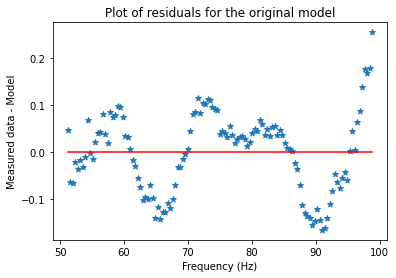

Chi-squared for this fit is 0.873569 with 118 degrees of freedom


In [9]:
sky_temps = np.reshape(T_sky, (len(T_sky), 1))

def physical_model(freq_fracs, b0, b1, b2, b3, b4):

    term1 = -2.5 + b1 + b2*np.log(freq_fracs)
    term2 = -b3 * freq_fracs**(-2)

    return b0 * np.power(freq_fracs, term1) * np.exp(term2) + b4*freq_fracs**(-2)


def question_2_1_c(b4, full_output=False):
    d = np.log(sky_temps - b4 * np.power(frequencies_matrix, -2)) + 2.5 * np.log(frequencies_matrix)
    # d = np.reshape(data, len(data))
    cov_power = data_matrix - b4 * np.power(frequencies_matrix, -2)
    cov_power = np.reshape(cov_power, len(cov_power))
    cov_power = np.diag(cov_power)

    A = np.empty((0, 4))
    for freq in frequencies_matrix:
        temp = np.array([1, np.log(freq[0]), (np.log(freq[0]))**2, -freq[0]**(-2)])
        A = np.vstack((A, temp))
    
    a = np.dot(cov_power, A)
    b = np.dot(cov_power, d)
    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

best_b4 = scipy.optimize.differential_evolution(question_2_1_c, [(800, 1200)]).x[0]
chi_squared, theta_MLE = question_2_1_c(best_b4, full_output=True)

predictions = physical_model(frequencies_matrix, np.exp(theta_MLE[0]), theta_MLE[1], theta_MLE[2], theta_MLE[3], best_b4)
residuals = sky_temps - predictions

# Plot residuals
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(frequencies, predictions - data_matrix, marker='*')
ax.plot([frequencies[0], frequencies[-1]], [0, 0], c='r')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Measured data - Model')
ax.set_title('Plot of residuals for the original model')
plt.show()

dof = len(sky_temps) - len(theta_MLE) - 1
print(f"Chi-squared for this fit is {chi_squared:.6f} with {dof} degrees of freedom")

### Part 2

# 2) 2) a)

In [10]:
# Exercise 2 part  2 part a)
def create_row(nu):
    array = np.array([nu**-2.5, nu**-2.5 * np.log(nu), nu**-2.5 * np.log(nu)**2 , nu**-4.5, nu**-2])
    return np.reshape(array, (1, 5)) 

def create_row_3(nu, c1, c2):
    array = np.array([nu**-2.5, nu**-2.5 * np.log(nu),
                      nu**-2.5 * np.log(nu)**2 , nu**-4.5, nu**-2,
                      np.exp(-abs((nu - c1)/c2)**5)])
    return np.reshape(array, (1, 6)) 

def create_A_matrix_0():
    A_matrix = create_row(frequencies_matrix[0][0])
    for i in range(1, len(frequencies_matrix)):
        A_matrix = np.vstack((A_matrix, create_row(frequencies_matrix[i][0])))
    return A_matrix

def create_A_matrix_2(c1, c2):
    A_matrix = create_row_3(frequencies_matrix[0][0], c1, c2)
    for i in range(1, len(frequencies_matrix)):
        A_matrix = np.vstack((A_matrix, create_row_3(frequencies_matrix[i][0], c1, c2)))
    return A_matrix

def new_model(c_params, full_output, c0_known, c0):
    c1, c2 = c_params[0], c_params[1]
    
    if not c0_known:
        A_matrix = create_A_matrix_2(c1, c2)
        data_matrix = np.reshape(T_sky, (len(T_sky), 1))
    
    if c0_known:
        A_matrix = create_A_matrix_0()
        data_matrix = np.reshape(T_sky, (len(T_sky), 1)) - c0*np.exp(-abs((frequencies_matrix - c1)/c2)**5)

    theta_star = np.linalg.lstsq(A_matrix, data_matrix)[0]
    difference = data_matrix - np.matmul(A_matrix, theta_star)
    chi_sqr = np.matmul(np.transpose(difference), difference)
    
    if full_output:
        return chi_sqr, theta_star, A_matrix
    else:
        return chi_sqr

c_1_star, c_2_star = differential_evolution(new_model, [(1, 1.1), (0.01, 0.5)], args=(False, False, 0)).x
chi_sqr_min, theta_star, A_matrix = new_model([c_1_star, c_2_star], True, False, 0)
N_dof = len(T_sky) - len(theta_star) - 2
residuals = np.reshape(T_sky, (len(T_sky), 1)) - np.matmul(A_matrix, theta_star)
rms_residuals = np.sqrt(np.mean(np.power(residuals, 2)))

print('This procedure yields the following results: c0 = {0:.3f} K , c1 = {1:.3f} MHz, c2 = {2:.3f} MHz'.
      format(abs(theta_star[-1][0]), c_1_star*75, c_2_star*75))
print('The found root-mean-square residual is: {:.5f}'.format(rms_residuals))

<ipython-input-10-da9717db42cc>:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_star = np.linalg.lstsq(A_matrix, data_matrix)[0]


This procedure yields the following results: c0 = 0.499 K , c1 = 78.255 MHz, c2 = 10.036 MHz
The found root-mean-square residual is: 0.02463


# 2) 2) b)

In [14]:
# Exercise 2 part b)
# New chi-squares
chi_sqr_1 = chi_sqr_min_1 * 40**2
chi_sqr_2 = chi_sqr_min_2 * 40**2

print(f"Original linear model: chi-squared = {chi_sqr_min_1:.2f}")
print(f"Modified linear model: chi-squared = {chi_sqr_min_2:.2f}")

Original linear model: chi-squared = 5804.29
Modified linear model: chi-squared = 9259.41


In [11]:
A_matrix = create_A_matrix_0()
chi_sqr_array = np.array([])

c0_range = np.linspace(-0.54, -0.46, 100)
for c0 in c0_range:
    print(c0)
    c_1_star, c_2_star = differential_evolution(new_model, [(1, 1.1), (0.01, 0.5)], args=(False, True, c0)).x
    chi_sqr = new_model([c_1_star, c_2_star], False, True, c0) * 40**2
    chi_sqr_array = np.append(chi_sqr_array, chi_sqr)

# chi_sqr_min = min(chi_sqr_array)
# c0_within_std = c0_range[np.argwhere(abs(chi_sqr_array-chi_sqr_min) <= 1)]
# c0_best_fit = c0_range[np.argwhere(abs(chi_sqr_array==chi_sqr_min))][0][0]
# c0_std = ((max(c0_within_std) + min(c0_within_std) - 2*c0_best_fit) / 2)[0]

chi_sqr_min = min(chi_sqr_array)
c0_within_std = c0_range[np.argwhere((chi_sqr_array-chi_sqr_min) <= 1)]
c0_best_fit = c0_range[np.argwhere(abs(chi_sqr_array==chi_sqr_min))][0][0]
c0_std = (abs(max(c0_within_std) - c0_best_fit)[0] + abs(min(c0_within_std) - c0_best_fit)[0])/2

print('The signal-to-noise is {:.2f}'.format(abs(c0_best_fit / c0_std)))

-0.54


<ipython-input-10-da9717db42cc>:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_star = np.linalg.lstsq(A_matrix, data_matrix)[0]


-0.5391919191919192
-0.5383838383838384
-0.5375757575757576
-0.5367676767676768
-0.535959595959596
-0.5351515151515152
-0.5343434343434343
-0.5335353535353535
-0.5327272727272727
-0.5319191919191919
-0.5311111111111111
-0.5303030303030304
-0.5294949494949496
-0.5286868686868688
-0.527878787878788
-0.5270707070707071
-0.5262626262626263
-0.5254545454545455
-0.5246464646464647
-0.5238383838383839
-0.5230303030303031
-0.5222222222222223
-0.5214141414141414
-0.5206060606060606
-0.5197979797979798
-0.518989898989899
-0.5181818181818182
-0.5173737373737374
-0.5165656565656566
-0.5157575757575757
-0.5149494949494949
-0.5141414141414141
-0.5133333333333334
-0.5125252525252526
-0.5117171717171718
-0.510909090909091
-0.5101010101010102
-0.5092929292929294
-0.5084848484848485
-0.5076767676767677
-0.5068686868686869
-0.5060606060606061
-0.5052525252525253
-0.5044444444444445
-0.5036363636363637
-0.5028282828282828
-0.502020202020202
-0.5012121212121212
-0.5004040404040404
-0.49959595959595965
-0.4

The obtained signal-to-noise is 31.65, which is fairly close to that obtained in the paper of 37.

### Part 3

# 2) 3) a)

In [16]:
# Exercise 2 part 3 part a)
def create_A_matrix_2(c1, c2):
    A_matrix = create_row_3(frequencies_matrix[0][0], c1, c2)
    for i in range(1, len(frequencies_matrix)):
        A_matrix = np.vstack((A_matrix, create_row_3(frequencies_matrix[i][0], c1, c2)))
    return A_matrix

def create_covr():
    A = (25e-3)**2
    B = 2*A
    covr = np.zeros((len(frequencies), len(frequencies)))
    for i in range(len(frequencies)):
        for j in range(len(frequencies)):
            cosine = np.cos(0.3*(frequencies[i] - frequencies[j]))
            exponential = np.exp(-abs(frequencies[i] - frequencies[j]) / 60)
            element = B * cosine * exponential
            if i == j:
                element += A
            covr[i][j] = element
    return covr
            
sigma_matrix = create_covr()
sigma_inverse = np.linalg.inv(sigma_matrix)
sigma_sqrt = scipy.linalg.sqrtm(sigma_inverse)

print('This is the obtained covariance matrix:')
print(sigma_matrix)

This is the obtained covariance matrix:
[[ 1.87500000e-03  1.23337080e-03  1.20009617e-03 ...  4.26915764e-05
  -2.41689676e-05 -8.98341779e-05]
 [ 1.23337080e-03  1.87500000e-03  1.23337080e-03 ...  1.09837138e-04
   4.26915764e-05 -2.41689676e-05]
 [ 1.20009617e-03  1.23337080e-03  1.87500000e-03 ...  1.76341522e-04
   1.09837138e-04  4.26915764e-05]
 ...
 [ 4.26915764e-05  1.09837138e-04  1.76341522e-04 ...  1.87500000e-03
   1.23337080e-03  1.20009617e-03]
 [-2.41689676e-05  4.26915764e-05  1.09837138e-04 ...  1.23337080e-03
   1.87500000e-03  1.23337080e-03]
 [-8.98341779e-05 -2.41689676e-05  4.26915764e-05 ...  1.20009617e-03
   1.23337080e-03  1.87500000e-03]]


# 2) 3) b)

In [17]:
# Exercise 2 part 3 part b)
# Creating the A matrix:
A_matrix = create_row(frequencies_matrix[0])
for i in range(1, len(frequencies_matrix)):
    A_matrix = np.vstack((A_matrix, create_row(frequencies_matrix[i])))
# Transpose it:
A_transpose = np.transpose(A_matrix)

alpha_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, data_matrix))
beta_matrix = np.matmul(A_transpose, np.matmul(sigma_inverse, A_matrix))
beta_inverse = np.linalg.inv(beta_matrix)

theta_star = np.matmul(beta_inverse, alpha_matrix)
difference_matrix = data_matrix - np.matmul(A_matrix, theta_star)
chi_sqr_1 = np.matmul(np.transpose(difference_matrix), np.matmul(sigma_inverse, difference_matrix))[0][0]
print('The corresponding chi-squared is: {:.3f}'.format(chi_sqr_1))

The corresponding chi-squared is: 207.723


# 2) 3) c)

In [ ]:
# Exercise 2 part 3 part c)
def new_model_2(c_params, c0, full_output):
    c1, c2, c3 = c_params[0], c_params[1], c_params[2]

    A_matrix = create_A_matrix_2(c1, c2)
    data_matrix = np.reshape(T_sky, (len(T_sky), 1)) - c0*np.exp(-np.power(abs((frequencies_matrix - c1)/c2), np.sqrt(c3)))

    theta_star = np.linalg.lstsq(np.dot(sigma_sqrt, A_matrix), np.dot(sigma_sqrt, data_matrix))[0]
    difference = data_matrix - np.matmul(A_matrix, theta_star)
    chi_sqr = np.matmul(np.transpose(difference), np.dot(sigma_inverse, difference))
    
    if full_output:
        return chi_sqr, theta_star
    else:
        return chi_sqr

c0_range = np.linspace(-0.56, -0.46, 100)
chi_squared_range = np.array([])
best_params_range = np.empty((0, 3))

for c0 in c0_range:
    print(c0)
    c1_star, c2_star, c3_star = scipy.optimize.differential_evolution(new_model_2, [(1, 1.1), (0.01, 0.5), (2, 8)],
                                                                      args=(c0, False)).x
    chi_squared = new_model_2([c1_star, c2_star, c3_star], c0, False)
    best_params_range = np.vstack((best_params_range, np.array([c1_star, c2_star, c3_star])))
    chi_squared_range = np.append(chi_squared_range, chi_squared)
    
    
min_index = np.argmin(chi_squared_range)
chi_sqr_min = chi_squared_range[min_index]
c0_best = c0_range[min_index]
c0_within_std = c0_range[np.argwhere((chi_squared_range-chi_sqr_min) <= 1)]
c0_std = (abs(max(c0_within_std) - c0_best)[0] + abs(min(c0_within_std) - c0_best)[0])/2

print(f"Found: c0 = {np.abs(c0_best):.3f} ± {c0_std:.4f} mK")
print(f"This is {(0.53 - np.abs(c0_best))/c0_std:.2f} sigma out from the reported value of 0.53 mK")
print(f"(Also found: c1 = {c1_star * 75:.2f} MHz, c2 = {c2_star * 75:.2f} MHz, c3 = {c3_star:.1f})")

# 2) 3) d)

In [ ]:
# Exercise 2 part 3 part d)
def new_model_3(c_params, c0, full_output):
    c1, c2 = c_params[0], c_params[1]

    A_matrix = create_A_matrix_2(c1, c2)
    data_matrix = np.reshape(T_sky, (len(T_sky), 1)) - c0*np.exp(-np.power(abs((frequencies_matrix - c1)/c2), 2))

    theta_star = np.linalg.lstsq(np.dot(sigma_sqrt, A_matrix), np.dot(sigma_sqrt, data_matrix))[0]
    difference = data_matrix - np.matmul(A_matrix, theta_star)
    chi_sqr = np.matmul(np.transpose(difference), np.dot(sigma_inverse, difference))
    
    if full_output:
        return chi_sqr, theta_star
    else:
        return chi_sqr

c0_range = np.linspace(-0.56, -0.46, 10)
chi_squared_range = np.array([])
best_params_range = np.empty((0, 2))

for c0 in c0_range:
    print(c0)
    c1_star, c2_star = scipy.optimize.differential_evolution(new_model_3, [(0.8, 1.3), (0.01, 0.6)],
                                                                      args=(c0, False)).x
    chi_squared = new_model_3([c1_star, c2_star], c0, False)
    best_params_range = np.vstack((best_params_range, np.array([c1_star, c2_star])))
    chi_squared_range = np.append(chi_squared_range, chi_squared)
    
    
min_index = np.argmin(chi_squared_range)
chi_sqr_min = chi_squared_range[min_index]
c0_best = c0_range[min_index]
c0_within_std = c0_range[np.argwhere((chi_squared_range-chi_sqr_min) <= 1)]
c0_std = (abs(max(c0_within_std) - c0_best)[0] + abs(min(c0_within_std) - c0_best)[0])/2

print(f"Found: c0 = {np.abs(c0_best):.3f} ± {c0_std:.4f} mK")
print(f"This is {(0.53 - np.abs(c0_best))/c0_std:.2f} sigma out from the reported value of 0.53 mK")
print(f"(Also found: c1 = {c1_star * 75:.2f} MHz, c2 = {c2_star * 75:.2f} MHz")

-0.56


<ipython-input-18-d50790397402>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_star = np.linalg.lstsq(np.dot(sigma_sqrt, A_matrix), np.dot(sigma_sqrt, data_matrix))[0]


-0.548888888888889
-0.5377777777777778
-0.5266666666666667
